<h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
<h2>Mini Jupyter Exercise #4</h2>
<h3>k-Nearest Neighbor Classification</h3>
<br>
<strong>Objective:</strong> In this exercise, we will engage in classification of images of handwritten digits ‘0’ and ‘1’ using
k-nearest neighbor (k-NN) classification.
<br>
<h4>Training Data</h4>
The training dataset for this problem corresponds to the images of handwritten digits ‘0’ and ‘1’ that come
prepackaged with the sklearn package. There are a total of 360 images of digits ‘0’ and ‘1’; we will divide
them into 300 images for training purposes, while we will evaluate the performance of k-NN classification
on the remaining 60 images, which we will refer to as the “test” set.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y = True)

# Labeled training set
training_images = images[:300]
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

num_of_classes = 2 #Number of Classes = 2

<h4>k-NN Classification Using 2-D Features</h4>
<br>
Principal Component Analysis (PCA) of images in the training set and computation two-dimensional PCA features of training images

[]

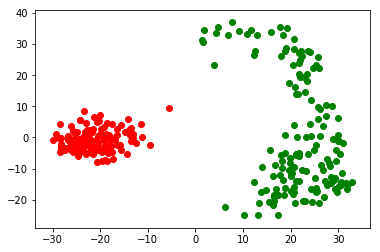

In [2]:
#Performing PCA on the image set with 2 principal components
#Then plotting training data in 2D (Red = 0, Green = 1)
pca = PCA(n_components = 2)
transformed_training_data = pca.fit_transform(training_images) #Transformed Training Data

for i in range(len(training_images)):
    if training_labels[i]==0:
        plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "red")
    else:
        plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "green")
plt.plot()

Classification of each image in the test set by first transforming it to the two-dimensional PCA domain using the
principal components obtained above and then using k-NN classification with k = 5 and the distance
metric being $\left \| \cdot  \right \|_2$.

[]

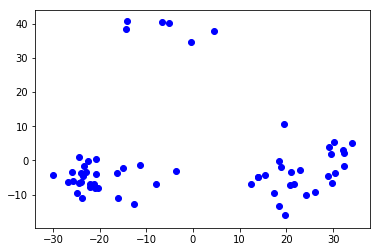

In [12]:
#Transforming Test Set into 2D
transformed_test_data = pca.fit_transform(test_images)
#Classifying Test Set with 5-Nearest Neighbors
k = 5
nn = np.zeros((len(transformed_test_data), k, 2)) #Array with each test data's 5 nearest neighbors's distance and index
for i in range(len(transformed_test_data)):
    distance = -1.0
    count = 0
    for j in range(len(transformed_training_data)):
        two_norm = np.linalg.norm(transformed_test_data[i]-transformed_training_data[j])
        #Filling up array with first 5 training data samples before finding 5 nearest neighbors
        if count < k:
                nn[i,count,0] = np.linalg.norm(transformed_test_data[i]-transformed_training_data[j])
                nn[i,count,1] = j
                count += 1
                distance = np.max(nn[i,:,0])
                continue
        #Replacing when found closer training data
        if two_norm < distance:
            max_index = np.where(nn[i,:,0]==np.max(nn[i,:,0]))[0][0]
            nn[i,max_index,0] = np.linalg.norm(transformed_test_data[i]-transformed_training_data[j])
            nn[i,max_index,1] = j
            distance = np.max(nn[i,:,0])

classified_test_labels = np.zeros((len(test_images)))
for i in range(len(nn)):
    neighbors = np.zeros((num_of_classes))
    for j in range(k):
        neighbors_class = training_labels[int(nn[i,j,1])]
        neighbors[neighbors_class] += 1
    classified_test_labels[i] = np.where(neighbors == np.max(neighbors))[0][0]

#Plotting Classified Test Data (Blue = Correct Classification, Black = Incorrect Classification)
for i in range(len(classified_test_labels)):
    if classified_test_labels[i] == test_labels[i]:
        plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="blue")
    else:
        plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="black")
plt.plot()

Two Plots Overlayed:

[]

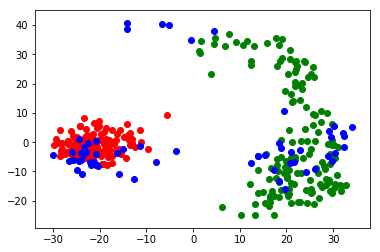

In [13]:
for i in range(len(training_images)):
    if training_labels[i]==0:
        plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "red")
    else:
        plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "green")
for i in range(len(classified_test_labels)):
    if classified_test_labels[i] == test_labels[i]:
        plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="blue")
    else:
        plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="black")
plt.plot()

Computation of the average classification error for the test set, defined as $\frac{1}{N}\sum_{i=1}^{N}1_{\left \{ \widehat{y_i}\neq y_i \right \}}$; here,
$y_i$ denotes the true label of the i-th image, $\widehat{y_i}$ denotes the label returned by k-NN, and N = 60 in this
particular problem.

In [14]:
#Error of Classification
for i in range(len(classified_test_labels)):
    loss = 0
    if classified_test_labels[i] != test_labels[i]:
        loss += 1
print("Average Classification Error:", loss/len(test_images))

Average Classification Error: 0.0


<h4>k-NN Classification Using Higher-dimensional Features</h4>
<br>
PCA of images in the training set and compute r-dimensional PCA features of training
images such that the top-r principal components capture 95% of variation within the training data